In [1]:
import torch
import torchvision
from torchvision import transforms

# Define a transform to convert the data to tensor
transform = transforms.Compose([transforms.ToTensor()])

# Download the training set
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Download the test set
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)


100%|██████████| 9912422/9912422 [00:00<00:00, 9979693.20it/s] 


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 6884274.48it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 8405445.63it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 2380423.44it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



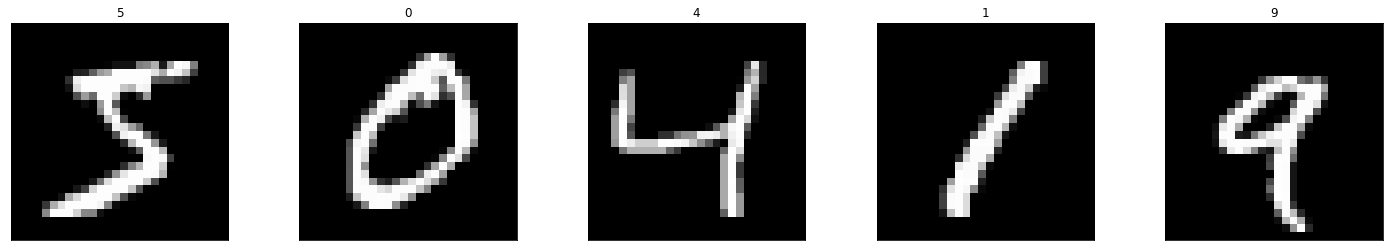

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#1a visualize the first 5 member fo the training set
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(5):
    ax = fig.add_subplot(1, 5, idx+1, xticks=[], yticks=[])
    plt.imshow(np.squeeze(trainset.train_data[idx]), cmap='gray')
    ax.set_title(str(trainset.train_labels[idx].item()))

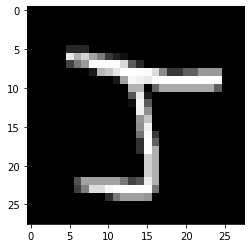

In [15]:
# 1b Visualize the third number in the dataset but rotated counterclockwise using the using only the flip and transpose functions in numpy.
plt.imshow(np.transpose(np.flip(np.array(trainset.train_data[2]), axis = 1)), cmap='gray')

In [31]:
#1c Create a batch of MNIST digits and flatten it to a single vector.
batch_size = 8
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
dataiter = iter(trainloader)
images, labels = next(dataiter)
flatten_images = images.view(batch_size, -1)
single_vector = np.array(images.flatten())
print(images.shape)
print(flatten_images.shape)
print(single_vector.shape)

torch.Size([8, 1, 28, 28])
torch.Size([8, 784])
(6272,)


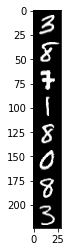

In [36]:
# 1d Visualize all numbers in the batch vertically by collapsing the batch dimension with the other appropriate dimension
fig = plt.figure(figsize=(25, 4))
plt.imshow(single_vector.reshape(28*batch_size, -1), cmap='gray')

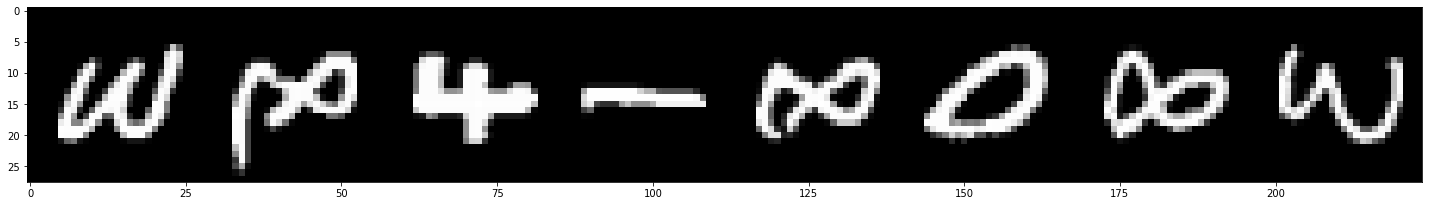

In [37]:
# 1e . Now visualize all numbers in the batch horizontally.
fig = plt.figure(figsize=(25, 4))
plt.imshow(single_vector.reshape(28, -1, order='F'), cmap='gray')

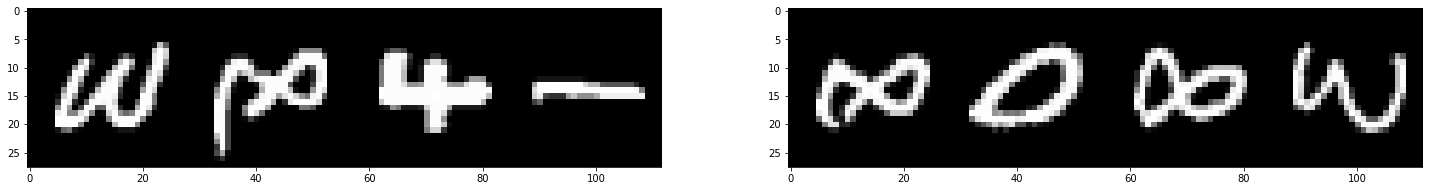

In [42]:
# 1f. plit the batch dimension into two new batches and plot horizontally. If your batch has an odd number place the extra digit on the bottom row. 
fig,ax = plt.subplots(1,2, figsize=(25, 4))
first_batch = single_vector[0:int(len(single_vector)/2)]
second_batch = single_vector[int(len(single_vector)/2):]
ax[0].imshow(first_batch.reshape(28, -1, order='F'), cmap='gray')
ax[1].imshow(second_batch.reshape(28, -1, order='F'), cmap='gray')